In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_infos = []
for i in range(9): # 9 clusters
    path = '../Data/Cluster'+str(i)
    df = pd.read_csv(path, delimiter=',')
    df.rename(columns={"Unnamed: 0": "original_id"},inplace=True)
    df = df.drop('cardio', axis=1) # remove cardio target
    df.insert(len(df.columns), 'cluster', i)
    df_infos.append(df)
    
    
cluster_summaries = pd.concat(df_infos, axis=0)
cluster_summaries

,original_id,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cluster
0,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,0
1,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,0
2,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
3,22,32,23046,1,158,90.0,145,85,2,2,0,0,1,0
4,24,35,16608,1,170,68.0,150,90,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,69983,99974,19652,1,165,72.0,120,80,1,1,0,0,1,8
14783,69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,8
14784,69989,99985,21013,1,157,83.0,120,70,1,1,0,0,1,8
14785,69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,8


In [3]:
df_feat = cluster_summaries.iloc[:,2:-1] # eventhing but last column
target = cluster_summaries.iloc[:,-1] # last column (cluster ID)

df_feat.head() # age is in days

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,20228,1,156,85.0,140,90,3,1,0,0,1
1,18857,1,165,64.0,130,70,3,1,0,0,0
2,22113,1,157,93.0,130,80,3,1,0,0,1
3,23046,1,158,90.0,145,85,2,2,0,0,1
4,16608,1,170,68.0,150,90,3,1,0,0,1


In [4]:
from sklearn.preprocessing import StandardScaler
# standardize: mean = 0, std = 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_feat)
print(scaled_features)

[[ 0.30768633 -0.73310834 -1.01816804 ... -0.31087913 -0.23838436
   0.49416711]
 [-0.24799666 -0.73310834  0.07804703 ... -0.31087913 -0.23838436
  -2.02360695]
 [ 1.07169978 -0.73310834 -0.89636637 ... -0.31087913 -0.23838436
   0.49416711]
 ...
 [ 0.62585639 -0.73310834 -0.89636637 ... -0.31087913 -0.23838436
   0.49416711]
 [ 0.09327619 -0.73310834  0.93065876 ... -0.31087913 -0.23838436
   0.49416711]
 [ 0.65058043 -0.73310834  0.07804703 ... -0.31087913 -0.23838436
   0.49416711]]


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])

# citation: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [7]:
cluster_summaries = cluster_summaries.reset_index()
finalDf = pd.concat([principalDf, cluster_summaries[['cluster']]], axis = 1)

finalDf

,PC 1,PC 2,cluster
0,0.912458,1.726798,0
1,0.803694,1.114356,0
2,0.733296,2.104801,0
3,0.752958,2.300270,0
4,0.289351,0.850575,0
...,...,...,...
69995,0.647389,-0.573732,8
69996,1.312415,-0.481831,8
69997,0.956781,-0.143000,8
69998,0.246371,-0.644510,8


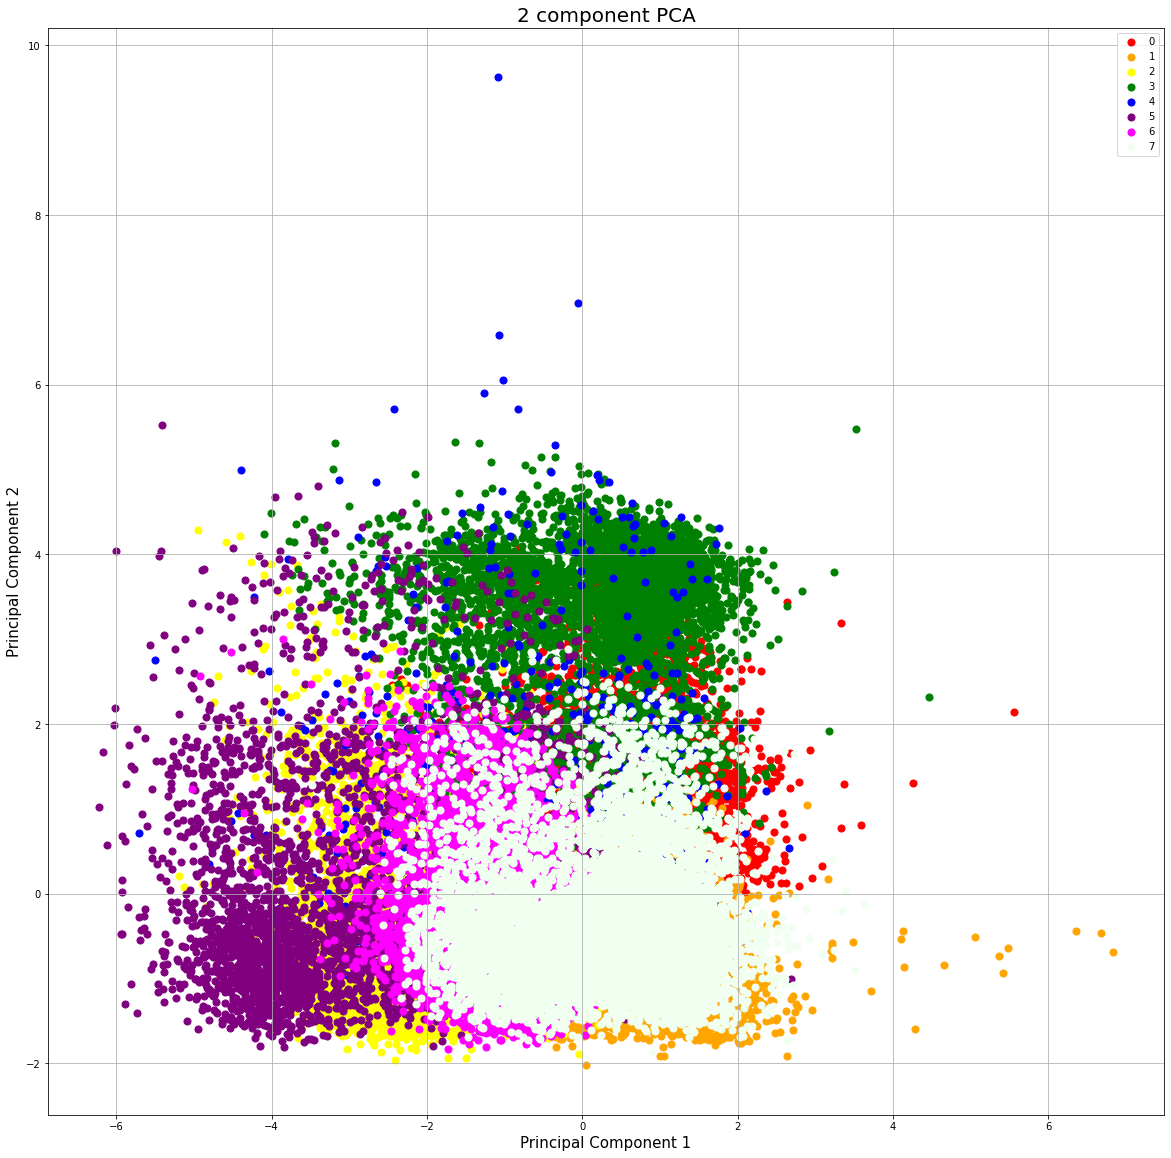

In [8]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4, 5, 6, 7, 8]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'magenta', 'honeydew']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()